# Customizing Ticks

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

## Major and Minor Ticks

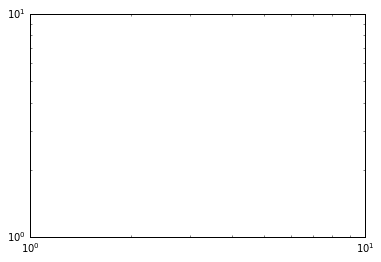

In [4]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [5]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [6]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels

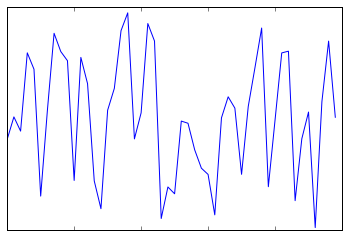

In [18]:
ax = plt.axes()
ax.plot(np.random.rand(50))

# hide major locator for y
ax.yaxis.set_major_locator(plt.NullLocator())

# hide major formatter for x
ax.xaxis.set_major_formatter(plt.NullFormatter()) # keep ticks
#ax.xaxis.set_major_locator(plt.NullLocator()) # erase ticks

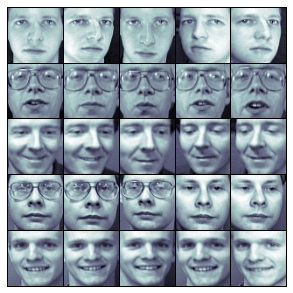

In [19]:
# erase ticks which do not convey relevant information for this particular visualization

fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

## Reducing or Increasing the Number of Ticks

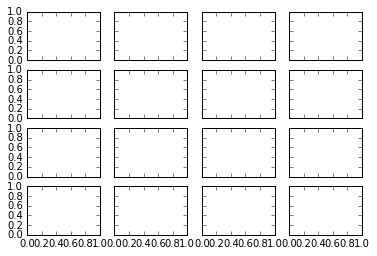

In [20]:
# not readable
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

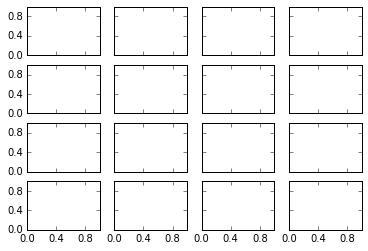

In [21]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

## Fancy Tick Formats

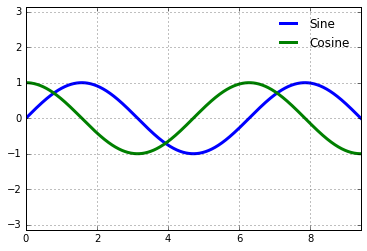

In [22]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

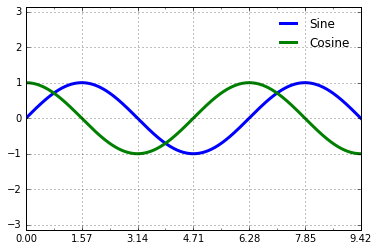

In [23]:
# improve x ticking using pi/2 as major and pi/4 as minor
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

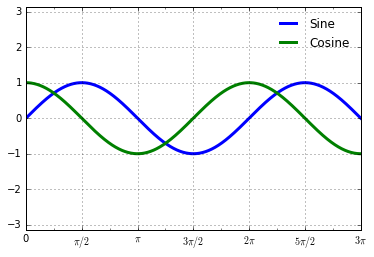

In [24]:
# It always a number ! So..
# Let's display as pi value using FuncFormatter

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig